# Resturant review analysis

In [3]:
# Step1 :- import libarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

In [2]:
# Step2 :- Data collection

In [6]:
df = pd.read_csv('r_data.tsv',delimiter='\t')

In [7]:
df


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
1381,clean,1
1382,less,0
1383,clean,1
1384,less,0


In [8]:
df.shape

(1386, 2)

In [9]:
# step3 :- Data cleaing

In [10]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [11]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [13]:
df.duplicated().sum()

373

In [14]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [15]:
df.shape

(1013, 2)

### Total 1013 reviews are available

In [19]:
# Step 4 :- EDA (ML preproccessing)  >> data is is in Text data

<Axes: xlabel='Liked', ylabel='count'>

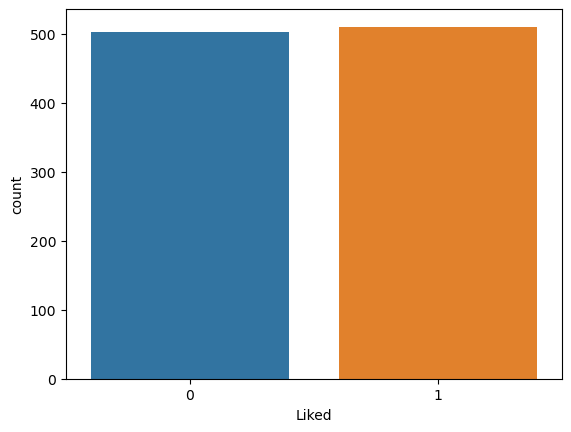

In [21]:
sns.countplot(x=df['Liked'])

In [24]:
df['Liked'].value_counts()

Liked
1    510
0    503
Name: count, dtype: int64

#### Data is balanced

In [25]:
# step5 :- text cleaning

In [27]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [28]:
# Preprocessing Dataset
# Each review undergoes through a preprocessing step, where all the vague information is removed.

# Removing the Stopwords, numeric and speacial charecters.
# Normalizing each review using the approach of stemming.

In [30]:
s_list =stopwords.words('english')
len(s_list)

198

In [33]:
corpus=[]
for i in df['Review']:
    # remove special characters or digits
    mystr=re.sub(r'[^A-Za-z\s]','',i)
    mystr=mystr.lower()
    # tokenization
    list1=mystr.split()
    # stopwords
    list2=[ i for i in list1 if i not in s_list]
    # stemming
    ps=PorterStemmer()
    list3=[ ps.stem(i)  for i in list2]
    final_str=' '.join(list3)
    corpus.append(final_str)

In [34]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti didnt tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberrymmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'that rightth red velvet cakeohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'foun

In [35]:
# Step 6 >> Covert letters to numeric

### Vectorization

From the cleaned dataset, potential features are extracted and are converted to numerical format. The vectorization techniques are used to convert textual data to numerical format. Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [59]:
y = df['Liked']
X = cv.fit_transform(corpus).toarray()

In [60]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
X.shape

(1013, 1612)

In [64]:
cv.get_feature_names_out()

array(['absolut', 'absolutley', 'accid', ..., 'yum', 'yummi', 'zero'],
      dtype=object)

In [65]:
with open('cv_rest','wb') as f:
    pickle.dump(cv,f)

In [66]:
# NO scaling >> Because tree base algorithm doesnt need of scaling 

In [67]:
# STep 7 >>> Splitting data into train and testing

In [78]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=72)

In [79]:
# Step 8 >> Model Training

In [80]:
from sklearn.naive_bayes import MultinomialNB
classifier1 = MultinomialNB(alpha=1.0)
classifier1.fit(X_train,y_train)

# predicting the test set results
y_pred = classifier1.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n',cm)

# Accuracy,Precision,Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print('Classification_report:\n', classification_report(y_test,y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = recall_score(y_test,y_pred)
score3 = precision_score(y_test,y_pred)
print('\n')

print('Accuracy is',round(score1*100,2),'%')
print('Recall score is',round(score3,2))
print('Precision score is',round(score2,2))


Confusion matrix:
 [[73 27]
 [13 90]]
Classification_report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       100
           1       0.77      0.87      0.82       103

    accuracy                           0.80       203
   macro avg       0.81      0.80      0.80       203
weighted avg       0.81      0.80      0.80       203



Accuracy is 80.3 %
Recall score is 0.77
Precision score is 0.87


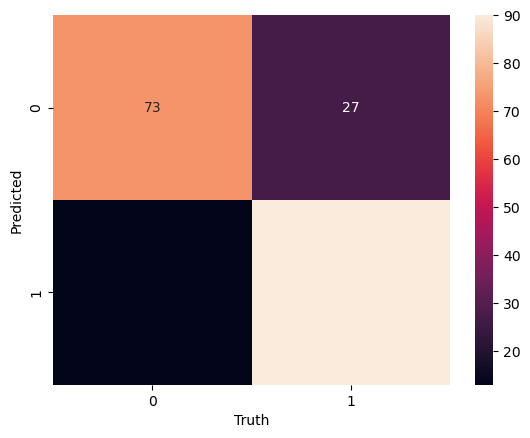

In [81]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

In [82]:
with open('model_rest','wb') as f:
    pickle.dump(classifier1,f)

In [83]:
# classifier1

In [100]:
d=['not Bad Taste']

In [101]:
d_cv=cv.transform(d).toarray()

In [103]:
result = classifier1.predict(d_cv)

In [107]:
a = 'not bad'
b=[a]
a_sc = cv.transform(b).toarray()
result = classifier1.predict(a_sc)
print(result)

[0]


In [106]:
if 'not' in a:
    result[0] = abs(result[0]-1)
print(result[0])

1


In [109]:
# checkiing accurcy with BerBernoullis algorithm

In [110]:
from sklearn.naive_bayes import BernoulliNB
classifier2 = BernoulliNB(alpha=1.0)
classifier2.fit(X_train,y_train)

# predicting the test set results
y_pred = classifier2.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n',cm)

# Accuracy,Precision,Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print('Classification_report:\n', classification_report(y_test,y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = recall_score(y_test,y_pred)
score3 = precision_score(y_test,y_pred)
print('\n')

print('Accuracy is',round(score1*100,2),'%')
print('Recall score is',round(score3,2))
print('Precision score is',round(score2,2))

Confusion matrix:
 [[68 32]
 [10 93]]
Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76       100
           1       0.74      0.90      0.82       103

    accuracy                           0.79       203
   macro avg       0.81      0.79      0.79       203
weighted avg       0.81      0.79      0.79       203



Accuracy is 79.31 %
Recall score is 0.74
Precision score is 0.9


In [111]:
# checking with Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression()
classifier3.fit(X_train,y_train)

# predicting the test set results
y_pred = classifier3.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n',cm)

# Accuracy,Precision,Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print('Classification_report:\n', classification_report(y_test,y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = recall_score(y_test,y_pred)
score3 = precision_score(y_test,y_pred)
print('\n')

print('Accuracy is',round(score1*100,2),'%')
print('Recall score is',round(score3,2))
print('Precision score is',round(score2,2))

Confusion matrix:
 [[77 23]
 [16 87]]
Classification_report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.79      0.84      0.82       103

    accuracy                           0.81       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.81      0.81       203



Accuracy is 80.79 %
Recall score is 0.79
Precision score is 0.84


## Analysis and Conculsuion

In [113]:
# software using GUI
# web using Flask